# Bienvenido al Tutorial de Dask

<img src="https://docs.dask.org/en/latest/_images/dask_horizontal.svg" align="right" width="30%" alt="Logo de Dask">

Dask es una biblioteca de cómputo paralelo y distribuido que escala el ecosistema existente de Python y PyData.

Dask puede escalar hasta la capacidad completa de tu computadora portátil y a un clúster en la nube.

## Un ejemplo de cómputo con Dask

En las siguientes líneas de código, estamos leyendo los datos de los taxis de la ciudad de Nueva York de 2015 y calculando la cantidad media de propina. No te preocupes por el código, esto es solo una demostración rápida. Lo revisaremos todo en el siguiente cuaderno. :)



In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Collecting graphviz


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.0 which is incompatible.
boto3 1.21.32 requires botocore<1.25.0,>=1.24.32, but you have botocore 1.31.64 which is incompatible.



  Created wheel for mamba: filename=mamba-0.11.3-py3-none-any.whl size=16306 sha256=06f516630dfc52282e617c6e6889d2aefb647aa548a15b4f3287e42be9a9d981
  Stored in directory: c:\users\nib1l\appdata\local\pip\cache\wheels\da\13\ea\adf0d30b197041c7d78dade68ed0acefe22701e503a54fa30d
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=158fb294425d7391101e3cee2a57795caacd4315f243ef2f07f4b7c9e33b518e
  Stored in directory: c:\users\nib1l\appdata\local\pip\cache\wheels\07\00\bc\937e878be0d781a569792a1e0e5acf149e463d4536453ec978
  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34473 sha256=9b1f46a3c87f304c7ed33e52d588f99e851cdb70fc80147e206da98dc5c6732d
  Stored in directory: c:\users\nib1l\appdata\local\pip\cache\wheels\2c\69\16\04ffdd2e6fbbf2b3aa97970ba8d01c36d09df025f19f25c57e
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3318 sha256=536c07228cec5941e9ef069fe573bba00621e12c8001a4d2222ae57469253256
  Stored in dir


## Un ejemplo de cómputo Dask

En las siguientes líneas de código, estamos leyendo los datos de los taxis de la ciudad de Nueva York de 2015 y calculando la cantidad media de propina. No te preocupes por el código, esto es solo una demostración rápida. Lo revisaremos todo en el siguiente cuaderno. :)


In [9]:
import dask.dataframe as dd
from dask.distributed import Client

In [11]:
# Crear un cliente Dask
client = Client()
client

C:\Users\nib1l\anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50514 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:50514/status,
Dashboard: http://127.0.0.1:50514/status,Workers: 4
Total threads: 8,Total memory: 11.69 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50515,Workers: 4
Dashboard: http://127.0.0.1:50514/status,Total threads: 8
Started: Just now,Total memory: 11.69 GiB
Comm: tcp://127.0.0.1:50536,Total threads: 2
Dashboard: http://127.0.0.1:50541/status,Memory: 2.92 GiB
Nanny: tcp://127.0.0.1:50518,




**Historia de Parquet:**

Parquet fue creado como un proyecto de código abierto por Apache Software Foundation. La idea detrás de Parquet era abordar las limitaciones de otros formatos de almacenamiento de datos, especialmente en el contexto de grandes conjuntos de datos y análisis distribuidos.

Fue desarrollado para ser parte del ecosistema de Apache Hadoop, pero a lo largo del tiempo, su popularidad ha crecido y ahora se utiliza en una variedad de entornos y herramientas de procesamiento de datos más allá de Hadoop.

**Diferencias frente a Formatos Convencionales:**

Antes de Parquet, los formatos de almacenamiento de datos más convencionales, como CSV o JSON, tenían ciertas limitaciones:

1. **Eficiencia en Lectura:**
   Los formatos convencionales a menudo requerían leer grandes bloques de datos, incluso si solo se necesitaba una pequeña parte. Parquet, al ser columnar, permite leer solo las columnas relevantes, haciendo que las operaciones de lectura sean más eficientes.

2. **Compresión y Almacenamiento:**
   Parquet introduce técnicas avanzadas de compresión y almacenamiento que reducen significativamente el espacio requerido para almacenar datos. En comparación, algunos formatos convencionales pueden ocupar más espacio en disco.

3. **Schema Evolution:**
   Parquet fue diseñado desde el principio para admitir cambios en el esquema de datos sin problemas. Puedes agregar nuevas columnas o modificar el esquema sin necesidad de reescribir todo el conjunto de datos, lo cual no siempre es fácil con formatos convencionales.

4. **Rendimiento en Análisis Distribuido:**
   En entornos distribuidos, como Apache Spark, Parquet se desempeña especialmente bien debido a su diseño columnar y su capacidad para dividir y procesar datos de manera eficiente.

5. **Interoperabilidad:**
   Parquet está diseñado para ser compatible con una variedad de lenguajes de programación y herramientas de procesamiento de datos, lo que facilita compartir datos entre diferentes sistemas.



In [12]:
# Leer datos del taxi de Nueva York de 2015
ddf = dd.read_parquet(
    "s3://dask-data/nyc-taxi/nyc-2015.parquet/part.*.parquet",
    columns=["passenger_count", "tip_amount"],
    storage_options={"anon": True},
)

# Calcular la cantidad media de propina por cantidad de pasajeros
result = ddf.groupby("passenger_count").tip_amount.mean().compute()
result

passenger_count
0    1.590343
1    1.752130
2    1.705595
3    1.579748
4    1.459269
5    1.728534
6    1.680769
7    3.863473
8    5.060718
9    5.075917
Name: tip_amount, dtype: float64

In [14]:
ddf.head()

,passenger_count,tip_amount
0,5,0.0
1,3,0.0
2,1,0.0
3,1,0.0
4,2,0.0


In [16]:
client.close()


## ¿Qué es Dask?

El proyecto "Dask" tiene muchas partes:

- Colecciones/API también conocidas como "biblioteca principal".
- Distribuido: para crear clústeres.
- Integraciones y un ecosistema más amplio.

### Colecciones de Dask

Dask proporciona ejecución en paralelo y distribuida en conjuntos de datos más grandes que la memoria. Podemos pensar en las API de Dask (también llamadas colecciones) a un nivel alto y bajo:

![Analología de alta y baja nivel](https://github.com/dask/dask-tutorial/blob/main/images/high_vs_low_level_coll_analogy.png?raw=true)

- **Colecciones de alto nivel:** Dask proporciona matrices, bolsas y marcos de datos de alto nivel que imitan a NumPy, listas y pandas, pero pueden operar en paralelo en conjuntos de datos que no caben en memoria.
- **Colecciones de bajo nivel:** Dask también proporciona colecciones diferidas y futuros de bajo nivel que le brindan un control más fino para construir cálculos personalizados en paralelo y distribuidos.

### Clúster Dask

La mayoría de las veces, cuando estás usando Dask, estarás utilizando un programador distribuido, que existe en el contexto de un clúster Dask. El clúster Dask está estructurado así:

![Descripción general distribuida](https://github.com/dask/dask-tutorial/blob/main/images/distributed-overview.png?raw=true)

### Ecosistema Dask

Además de la biblioteca principal de Dask y su programador distribuido, el ecosistema de Dask conecta varias iniciativas adicionales, que incluyen:

- Dask-ML (API paralela al estilo de scikit-learn).
- Dask-sql.
- Dask-mongo.
- Dask-bigquery.

Consulta la página de [casos de uso de Dask](https://stories.dask.org/en/latest/) que proporciona

 detalles sobre cómo se utiliza Dask en diversas disciplinas.

## Empezando con Dask

Para comenzar con Dask, hay varios recursos disponibles:

1. **Documentación oficial:** La documentación oficial de Dask es un recurso excelente. Puedes encontrarla [aquí](https://docs.dask.org/en/latest/).
2. **Blog de Dask:** El [blog de Dask](https://blog.dask.org/) es un buen lugar para obtener información sobre las últimas novedades, características y casos de uso.
3. **Ejemplos en la documentación:** La documentación de Dask tiene [ejemplos prácticos](https://docs.dask.org/en/latest/examples.html) que puedes seguir para entender mejor cómo funciona Dask.
4. **Charlas y tutoriales en vídeo:** Puedes encontrar charlas y tutoriales en vídeo sobre Dask en plataformas como YouTube y Vimeo. Estos pueden ser útiles para obtener una comprensión práctica de Dask.


Para obtener información más detallada, visita la [documentación oficial de Dask](https://docs.dask.org/en/latest/).

¡Feliz cómputo con Dask! 🚀


**DataFrames: Leer y Escribir Datos**

Dask DataFrames pueden leer y almacenar datos en muchos de los mismos formatos que los DataFrames de Pandas. En este ejemplo, leemos y escribimos datos en los populares formatos CSV y Parquet, y discutimos las mejores prácticas al usar estos formatos.


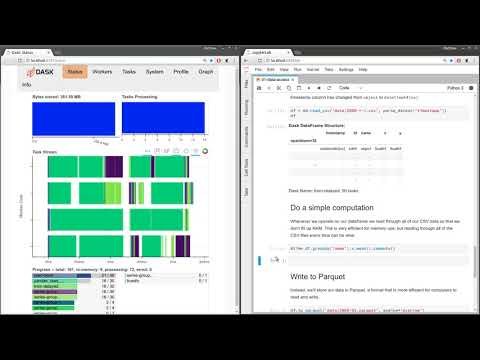

In [17]:
from IPython.display import YouTubeVideo

YouTubeVideo("0eEsIA0O1iE")


**Iniciar el Cliente Dask para el Tablero**

Iniciar el Cliente Dask es opcional, pero proporciona un tablero útil para obtener información sobre la computación. El enlace al tablero se volverá visible al crear el cliente a continuación. Recomendamos tenerlo abierto en un lado de la pantalla mientras se usa el cuaderno en el otro.



In [18]:

from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=4, processes=True, memory_limit='2GB')
client


C:\Users\nib1l\anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50713 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:50713/status,
Dashboard: http://127.0.0.1:50713/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50714,Workers: 1
Dashboard: http://127.0.0.1:50713/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:50721,Total threads: 4
Dashboard: http://127.0.0.1:50722/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:50717,




**Crear Conjunto de Datos Artificial**

Primero creamos un conjunto de datos artificial y lo escribimos en muchos archivos CSV. Esto es solo para crear un conjunto de datos para el resto del cuaderno.



In [19]:

import dask
df = dask.datasets.timeseries()


In [20]:

import os
import datetime

if not os.path.exists('data'):
    os.mkdir('data')

def name(i):
    return str(datetime.date(2000, 1, 1) + i * datetime.timedelta(days=1))

df.to_csv('data/*.csv', name_function=name);




**Leer Archivos CSV**

Ahora tenemos muchos archivos CSV en nuestro directorio de datos, uno para cada día en enero de 2000. Podemos leerlos como un DataFrame lógico utilizando la función `dd.read_csv` con una cadena de comodines.



In [21]:
import dask.dataframe as dd


In [23]:
!dir data\*.csv 

 El volumen de la unidad C es OS
 El n£mero de serie del volumen es: 166C-8E9C

 Directorio de C:\Users\nib1l\Downloads\dask-tutorial2\dask-tutorial\data

25/11/2023  09:09 a. m.         6,167,579 2000-01-01.csv
25/11/2023  09:09 a. m.         6,168,352 2000-01-02.csv
25/11/2023  09:10 a. m.         6,168,431 2000-01-03.csv
25/11/2023  09:10 a. m.         6,168,421 2000-01-04.csv
25/11/2023  09:10 a. m.         6,167,971 2000-01-05.csv
25/11/2023  09:10 a. m.         6,168,238 2000-01-06.csv
25/11/2023  09:10 a. m.         6,168,000 2000-01-07.csv
25/11/2023  09:10 a. m.         6,168,596 2000-01-08.csv
25/11/2023  09:10 a. m.         6,167,338 2000-01-09.csv
25/11/2023  09:10 a. m.         6,168,209 2000-01-10.csv
25/11/2023  09:09 a. m.         6,168,308 2000-01-11.csv
25/11/2023  09:09 a. m.         6,167,648 2000-01-12.csv
25/11/2023  09:10 a. m.         6,168,832 2000-01-13.csv
25/11/2023  09:10 a. m.         6,167,661 2000-01-14.csv
25/11/2023  09:10 a. m.         6,168,460 2000-


**Ajustar read_csv**

La función `read_csv` de Pandas tiene *muchas* opciones para ayudarte a analizar archivos. La versión de Dask utiliza la función de Pandas internamente, por lo que admite muchas de las mismas opciones.



pd.read_csv?



dd.read_csv?



En este caso, usamos el argumento `parse_dates` para analizar la columna de marca de tiempo como fecha y hora.


In [24]:

df = dd.read_csv('data/2000-*-*.csv', parse_dates=['timestamp'])
df.head()


,timestamp,name,id,x,y
0,2000-01-01 00:00:00,Michael,1015,0.580695,-0.647932
1,2000-01-01 00:00:01,Sarah,1024,0.982060,0.572636
2,2000-01-01 00:00:02,Ray,1023,-0.312666,0.054036
3,2000-01-01 00:00:03,Kevin,969,-0.407715,0.535258
4,2000-01-01 00:00:04,Jerry,978,-0.560230,-0.333095


In [30]:
df.shape[0].compute()

2592000


**Realizar una Simple Computación**

Cuando operamos en nuestro DataFrame, leemos todos los archivos CSV para no llenar la RAM. Esto es eficiente en el uso de memoria, pero puede ser lento al leer todos los archivos CSV cada vez.


In [31]:

%%time
df.groupby('name').x.mean()#.compute()


CPU times: total: 0 ns
Wall time: 15.7 ms


Dask Series Structure:
npartitions=1
    float64
        ...
Name: x, dtype: float64
Dask Name: truediv, 7 graph layers


**Escribir en Parquet**

En su lugar, almacenaremos nuestros datos en Parquet, un formato más eficiente para que las computadoras lo lean y escriban.


In [32]:
df.to_parquet('data/2000-01.parquet', engine='pyarrow')


**Leer desde Parquet**


In [14]:
df = dd.read_parquet('data/2000-01.parquet', engine='pyarrow')
df

,timestamp,name,id,x,y
npartitions=30,,,,,
,datetime64[ns],object,int64,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [15]:
%%time
df.groupby('name').x.mean().compute()

CPU times: total: 234 ms
Wall time: 1.61 s


name
Alice       0.002646
Bob         0.001673
Charlie    -0.001324
Dan        -0.000503
Edith      -0.000873
Frank      -0.002781
George     -0.000178
Hannah      0.000786
Ingrid      0.000908
Jerry      -0.000030
Kevin      -0.000006
Laura       0.002467
Michael     0.002706
Norbert    -0.001682
Oliver      0.000186
Patricia   -0.000175
Quinn      -0.002145
Ray         0.000552
Sarah       0.000148
Tim         0.000869
Ursula      0.003722
Victor      0.000521
Wendy      -0.002533
Xavier      0.001817
Yvonne     -0.003890
Zelda      -0.000277
Name: x, dtype: float64


**Seleccionar Solo las Columnas que Planeas Usar**

Parquet es una columna de almacenamiento, lo que significa que puede extraer eficientemente solo algunas columnas de tu conjunto de datos.


In [16]:
%%time
df = dd.read_parquet('data/2000-01.parquet', columns=['name', 'x'], engine='pyarrow')
df.groupby('name').x.mean().compute()

CPU times: total: 109 ms
Wall time: 1.59 s


name
Alice       0.002646
Bob         0.001673
Charlie    -0.001324
Dan        -0.000503
Edith      -0.000873
Frank      -0.002781
George     -0.000178
Hannah      0.000786
Ingrid      0.000908
Jerry      -0.000030
Kevin      -0.000006
Laura       0.002467
Michael     0.002706
Norbert    -0.001682
Oliver      0.000186
Patricia   -0.000175
Quinn      -0.002145
Ray         0.000552
Sarah       0.000148
Tim         0.000869
Ursula      0.003722
Victor      0.000521
Wendy      -0.002533
Xavier      0.001817
Yvonne     -0.003890
Zelda      -0.000277
Name: x, dtype: float64

In [33]:
client.close()


 **DataFrames: Groupby**
   - Este cuaderno utiliza las operaciones groupby-aggregate y groupby-apply de Pandas en dataframes escalables de Dask. Discutirá tanto el uso común como las mejores prácticas.

 **Iniciar el Cliente Dask para el Panel de control**
   - Iniciar el Cliente Dask es opcional. Proporcionará un panel de control que es útil para obtener información sobre la computación.
   - El enlace al panel de control será visible al crear el cliente a continuación. Se recomienda tenerlo abierto en un lado de tu pantalla mientras usas el cuaderno en el otro lado. Esto puede requerir algún esfuerzo para organizar las ventanas, pero ver ambas al mismo tiempo es muy útil para aprender.


In [34]:
df

,timestamp,name,id,x,y
npartitions=30,,,,,
,datetime64[ns],object,int64,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [35]:
from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=4, processes=True, memory_limit='2GB')
client

C:\Users\nib1l\anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50853 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:50853/status,
Dashboard: http://127.0.0.1:50853/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50854,Workers: 1
Dashboard: http://127.0.0.1:50853/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:50862,Total threads: 4
Dashboard: http://127.0.0.1:50863/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:50857,



 **Conjunto de datos artificial**
   - Creamos un conjunto de datos artificial de series temporales para ayudarnos a trabajar con operaciones groupby.


In [19]:
import dask
df = dask.datasets.timeseries()
df


,name,id,x,y
npartitions=30,,,,
2000-01-01,object,int32,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


En Dask, df.persist() es un método que se utiliza para almacenar en memoria persistente los resultados de un cálculo realizado en un dataframe Dask. La persistencia de un dataframe Dask implica que los datos se almacenan en la memoria del clúster o en el disco, dependiendo de la configuración.

La persistencia es útil cuando se espera que se realicen múltiples operaciones en un dataframe y se quiere evitar recalcular ciertos resultados intermedios cada vez que se realiza una nueva operación. Al persistir un dataframe, Dask intenta almacenar los datos resultantes en la memoria del clúster o en el disco, según el tamaño de los datos y la configuración del clúster.
Este conjunto de datos es lo suficientemente pequeño como para caber en la memoria del clúster, así que lo persistimos ahora.


In [20]:

df = df.persist()
df

,name,id,x,y
npartitions=30,,,,
2000-01-01,object,int32,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [21]:
df.head()

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Laura,901,-0.473959,0.344233
2000-01-01 00:00:01,Tim,945,0.719744,0.892843
2000-01-01 00:00:02,Ingrid,1000,0.894493,-0.451938
2000-01-01 00:00:03,Michael,966,-0.646196,-0.284209
2000-01-01 00:00:04,Quinn,1003,0.074558,-0.907729




**Groupby Aggregations**
- Los dataframes de Dask implementan un subconjunto comúnmente utilizado de la API de groupby de Pandas.
- Comenzamos con las agregaciones groupby, que son generalmente bastante eficientes, asumiendo que el número de grupos es pequeño (menos de un millón).



In [22]:

df.groupby('name').x.mean().compute()


name
Alice       0.001208
Bob         0.000392
Charlie     0.001201
Dan         0.002413
Edith      -0.002557
Frank      -0.002850
George      0.002297
Hannah      0.002402
Ingrid     -0.001267
Jerry       0.000264
Kevin       0.000238
Laura      -0.000332
Michael    -0.002672
Norbert     0.000019
Oliver      0.001146
Patricia    0.002351
Quinn       0.002084
Ray        -0.002233
Sarah      -0.000602
Tim         0.000862
Ursula     -0.000009
Victor     -0.000736
Wendy      -0.003670
Xavier     -0.001157
Yvonne     -0.001383
Zelda       0.000257
Name: x, dtype: float64

El rendimiento dependerá de la agregación que realices (media vs. desviación estándar), la clave por la cual agrupas (name vs. id) y el número total de grupos.

In [23]:

%time _ = df.groupby('id').x.mean().compute()


CPU times: total: 31.2 ms
Wall time: 490 ms


In [24]:

%time _ = df.groupby('name').x.mean().compute()


CPU times: total: 78.1 ms
Wall time: 847 ms



También se realiza una agregación más compleja y se muestra el tiempo.


In [25]:

%time df.groupby('name').agg({'x': ['mean', 'std'], 'y': ['mean', 'count']}).compute().head()


CPU times: total: 15.6 ms
Wall time: 556 ms


x                   y        
             mean       std      mean   count
name                                         
Laura   -0.000332  0.578969 -0.002091   99596
Tim      0.000862  0.577055  0.003403  100048
Ingrid  -0.001267  0.576283  0.003948   99615
Michael -0.002672  0.576341 -0.001667   99569
Quinn    0.002084  0.578398  0.001698  100124



Esto es igual que con Pandas. En términos generales, las agregaciones groupby de Dask.dataframe tienen un rendimiento similar a las agregaciones groupby de Pandas, pero son más escalables.

**Agregaciones personalizadas**
- La operación `Aggregate` de Dask dataframe está disponible para agregaciones personalizadas.

**Muchos grupos y `split_out`**
- Por defecto, las agregaciones groupby devuelven el resultado como un Dask dataframe de una sola partición. Sin embargo, en casos con muchos grupos, puede ser necesario dividir la salida en varias particiones. Esto se controla con el parámetro `split_out`.



In [ ]:

# Gráfico computacional de una agregación de salida única (para un número pequeño de grupos, como 1000)
df.groupby('name').x.mean().visualize(node_attr={'penwidth': '6'})


In [ ]:

# Gráfico computacional de una agregación con cuatro salidas (para un número mayor de grupos, como 1000000)
df.groupby('id').x.mean(split_out=4).visualize(node_attr={'penwidth': '6'})



**Groupby Apply**
- Las agregaciones groupby son generalmente bastante rápidas porque se pueden descomponer fácilmente en operaciones conocidas.
- Sin embargo, para algunas operaciones, la función aplicada requiere *todos* los datos de un grupo. Esto puede forzar una gran cantidad de comunicación y ser más costoso, pero es posible con el método Groupby-apply. Esto debería evitarse si una agregación groupby es suficiente.

In [37]:
from sklearn.linear_model import LinearRegression

def train(partition):
      if partition.empty:
         return
      est = LinearRegression()
      est.fit(partition[['x', 'id']].values, partition.y.values)
      return est

%time result=df.groupby('name').apply(train, meta=object).compute().sort_index()


C:\Users\nib1l\anaconda3\lib\site-packages\dask\dataframe\core.py:6762: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


CPU times: total: 1.86 s
Wall time: 12.6 s


In [47]:
result.Alice.coef_

array([ 4.84709589e-03, -6.09302078e-05])

En este ejemplo, entrenamos un modelo simple de aprendizaje automático de Scikit-Learn en cada nombre de persona.


## Gotchas de Pandas a Dask

Algunas diferencias clave al transferir código de `Pandas` para ejecutarse en un entorno de `Dask`.
La mayoría de los problemas tienen un enlace a la [documentación de Dask](https://docs.dask.org/en/latest/) para obtener información adicional.

## Configuración de Dask


In [48]:

import dask
import dask.dataframe as dd
import pandas as pd
print(f'Versión de Dask: {dask.__version__}')
print(f'Versión de Pandas: {pd.__version__}')


Versión de Dask: 2023.1.0
Versión de Pandas: 1.5.3



### Iniciar el cliente Dask para el panel de control

Iniciar el cliente Dask es opcional. En este ejemplo, estamos utilizando un `LocalCluster`, que también proporcionará un panel de control útil para obtener información sobre la computación.
Para obtener información adicional sobre [Dask Client, consulta la documentación](https://docs.dask.org/en/latest/setup.html?highlight=client#setup).



In [49]:

from dask.distributed import Client
client = Client()
client


C:\Users\nib1l\anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50909 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:50909/status,
Dashboard: http://127.0.0.1:50909/status,Workers: 4
Total threads: 8,Total memory: 11.69 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50910,Workers: 4
Dashboard: http://127.0.0.1:50909/status,Total threads: 8
Started: Just now,Total memory: 11.69 GiB
Comm: tcp://127.0.0.1:50929,Total threads: 2
Dashboard: http://127.0.0.1:50931/status,Memory: 2.92 GiB
Nanny: tcp://127.0.0.1:50913,



Ver [documentación para configuración adicional del clúster](http://distributed.dask.org/en/latest/local-cluster.html)

## Crear 2 DataFrames para comparación:

1. Para Dask
2. Para Pandas
Dask viene con conjuntos de datos de muestra integrados, los usaremos para nuestro ejemplo.



In [53]:
ddf = dask.datasets.timeseries()
ddf


,name,id,x,y
npartitions=30,,,,
2000-01-01,object,int32,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...



Recuerda que el `framework Dask` es **perezoso**, por lo que, para ver el resultado, necesitamos ejecutar [compute()](https://docs.dask.org/en/latest/generated/dask.dataframe.DataFrame.compute.html) (o `head()`, que ejecuta compute()).



In [54]:

ddf.head(2)


,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Quinn,966,-0.243025,-0.975146
2000-01-01 00:00:01,Oliver,1074,-0.864373,0.502128


In [55]:
ddf.tail()

,name,id,x,y
timestamp,,,,
2000-01-30 23:59:55,Tim,956,-0.070062,-0.021732
2000-01-30 23:59:56,Jerry,965,0.401153,0.020679
2000-01-30 23:59:57,Laura,991,-0.812659,-0.425269
2000-01-30 23:59:58,Edith,1011,-0.972930,0.093860
2000-01-30 23:59:59,Dan,978,-0.633163,-0.863772


#### DataFrame de Pandas

Para crear un DataFrame de Pandas, podemos usar el método `compute()` en un DataFrame de Dask.



In [56]:

pdf = ddf.compute()
print(type(pdf))
pdf.head(2)


<class 'pandas.core.frame.DataFrame'>


,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Quinn,966,-0.243025,-0.975146
2000-01-01 00:00:01,Oliver,1074,-0.864373,0.502128



### DataFrame.shape

También podemos ver la *pereza de Dask* al usar el atributo de forma.



In [34]:

print(f'Forma de Pandas: {pdf.shape}')
print('---------------------------')
print(f'Forma perezosa de Dask: {ddf.shape}')


Forma de Pandas: (2592000, 4)
---------------------------
Forma perezosa de Dask: (Delayed('int-49e029be-b49f-47c5-87b6-4dece021f560'), 4)


No podemos obtener la forma completa antes de acceder a todas las particiones; ejecutar `len` lo hará.



In [57]:

print(f'Forma calculada de Dask: {len(ddf.index):,}')  # costoso


Forma calculada de Dask: 2,592,000


### Crear un DataFrame Dask desde Pandas

Para utilizar las capacidades de Dask en un DataFrame de Pandas existente (`pdf`), debemos convertir el DataFrame de Pandas en un DataFrame de Dask (`ddf`) con el método [from_pandas](https://docs.dask.org/en/latest/generated/dask.dataframe.from_pandas.html).
Debes proporcionar el número de particiones o el tamaño del fragmento que se utilizará para generar el DataFrame de Dask.



In [36]:

ddf2 = dask.dataframe.from_pandas(pdf, npartitions=10)
ddf2


,name,id,x,y
npartitions=10,,,,
2000-01-01 00:00:00,object,int32,float64,float64
2000-01-04 00:00:00,...,...,...,...
...,...,...,...,...
2000-01-28 00:00:00,...,...,...,...
2000-01-30 23:59:59,...,...,...,...


### Particiones en DataFrames Dask

Observa que al crear un DataFrame Dask, necesitamos suministrar un argumento de `npartitions`. El número de particiones ayudará a `Dask` a dividir el DataFrame de Pandas y paralelizar la computación. Cada partición es un DataFrame separado. Para obtener información adicional, consulta la [documentación de particiones](https://docs.dask.org/en/latest/dataframe-design.html?highlight=meta%20utils#partitions).

Un ejemplo de esto se puede ver al examinar el método `reset_index()`:


In [37]:
pdf2 = pdf.reset_index()
# Solo 1 fila
pdf2.loc[0]


timestamp    2000-01-01 00:00:00
name                      Ingrid
id                          1003
x                       0.098177
y                      -0.990423
Name: 0, dtype: object

In [38]:

ddf2 = ddf2.reset_index()
# cada partición tiene un índice=0
ddf2.loc[0].compute()


,timestamp,name,id,x,y
0,2000-01-01,Ingrid,1003,0.098177,-0.990423
0,2000-01-04,Edith,985,-0.257429,0.903325
0,2000-01-07,Quinn,970,0.427111,0.985512
0,2000-01-10,Ingrid,1015,-0.885755,0.066754
0,2000-01-13,Edith,1025,-0.230421,-0.867474
0,2000-01-16,Ursula,971,-0.555176,-0.071181
0,2000-01-19,Zelda,1034,-0.493858,-0.676658
0,2000-01-22,Zelda,977,0.293014,0.763813
0,2000-01-25,Patricia,1060,-0.418098,-0.384391
0,2000-01-28,Wendy,993,0.922326,-0.846015


## DataFrame Dask vs DataFrame Pandas

Ahora que tenemos un DataFrame `dask` (`ddf`) y un DataFrame `pandas` (`pdf`), podemos comenzar a comparar las interacciones con ellos.

### Cambio conceptual: de Actualizar a Insertar/Eliminar

Dask no actualiza, por lo que no hay argumentos como `inplace=True` que existen en Pandas. Para más detalles, consulta [issue#653 en GitHub](https://github.com/dask/dask/issues/653).

### Renombrar columnas



In [39]:

# Pandas
print(pdf.columns)
pdf = pdf.rename(columns={'id':'ID'})
pdf.columns


Index(['name', 'id', 'x', 'y'], dtype='object')


Index(['name', 'ID', 'x', 'y'], dtype='object')

In [58]:

# Dask
print(ddf.columns)
ddf = ddf.rename(columns={'id':'ID'})
ddf.columns


Index(['name', 'id', 'x', 'y'], dtype='object')


Index(['name', 'ID', 'x', 'y'], dtype='object')

### Manipulaciones de datos

Hay varias diferencias al manipular datos.

#### loc - Pandas



In [59]:

cond_pdf = (pdf['x']>0.5) & (pdf['x']<0.8)
pdf.loc[cond_pdf, ['y']] = pdf['y']* 100
pdf[cond_pdf].head(2)


,name,id,x,y
timestamp,,,,
2000-01-01 00:00:20,Ursula,920,0.656334,-97.376634
2000-01-01 00:00:21,Charlie,1059,0.539045,-21.449409


#### Error


In [60]:


cond_ddf = (ddf['x']>0.5) & (ddf['x']<0.8)
ddf.loc[cond_ddf, ['y']] = ddf['y']* 100
ddf[cond_ddf].head(2)


TypeError: '_LocIndexer' object does not support item assignment


#### Dask - usa mask/where



In [61]:

# Pandas
pdf['y'] = pdf['y'].mask(cond=cond_pdf, other=pdf['y']* 100)
pdf.head(2)

## Dask
cond_ddf = (ddf['x']>0.5) & (ddf['x']<0.8)
ddf['y'] = ddf['y'].mask(cond=cond_ddf, other=ddf['y']* 100)
ddf.head(2)


,name,ID,x,y
timestamp,,,,
2000-01-01 00:00:00,Quinn,966,-0.243025,-0.975146
2000-01-01 00:00:01,Oliver,1074,-0.864373,0.502128


#### Convertir el índice en columna de tiempo



In [44]:

# Solo Pandas
pdf = pdf.assign(times=pd.to_datetime(pdf.index).time)
pdf.head(2)


,name,ID,x,y,times
timestamp,,,,,
2000-01-01 00:00:00,Ingrid,1003,0.098177,-0.990423,00:00:00
2000-01-01 00:00:01,Kevin,958,-0.424830,-0.802630,00:00:01


In [45]:

# Dask o Pandas
ddf = ddf.assign(times=ddf.index.astype('M8[ns]'))
# o  ddf = ddf.assign(Time= dask.dataframe.to_datetime(ddf.index, format='%Y-%m-%d'). )
ddf['times'] = ddf['times'].dt.time
ddf =client.persist(ddf)
ddf.head(2)


,name,ID,x,y,times
timestamp,,,,,
2000-01-01 00:00:00,Ingrid,1003,0.098177,-0.990423,00:00:00
2000-01-01 00:00:01,Kevin,958,-0.424830,-0.802630,00:00:01


## Eliminar NA en una columna



In [62]:

# No hay problema con la eliminación regular de columnas
pdf = pdf.drop(labels=['x'],axis=1)
ddf = ddf.drop(labels=['x'],axis=1)

In [64]:
ddf

,name,ID,y
npartitions=30,,,
2000-01-01,object,int32,float64
2000-01-02,...,...,...
...,...,...,...
2000-01-30,...,...,...
2000-01-31,...,...,...


In [65]:
pdf = pdf.dropna(axis=1, how='all')
pdf.head(2)

,name,id,y
timestamp,,,
2000-01-01 00:00:00,Quinn,966,-0.975146
2000-01-01 00:00:01,Oliver,1074,0.502128


In [66]:
pdf

,name,id,y
timestamp,,,
2000-01-01 00:00:00,Quinn,966,-0.975146
2000-01-01 00:00:01,Oliver,1074,0.502128
2000-01-01 00:00:02,Jerry,1028,-0.498114
2000-01-01 00:00:03,Dan,998,-0.573370
2000-01-01 00:00:04,Laura,972,0.215855
...,...,...,...
2000-01-30 23:59:55,Tim,956,-0.021732
2000-01-30 23:59:56,Jerry,965,0.020679
2000-01-30 23:59:57,Laura,991,-0.425269


In [67]:
# Pandas
pdf = pdf.assign(colna = None)
# Dask
ddf = ddf.assign(colna = None)
ddf.head()

,name,ID,y,colna
timestamp,,,,
2000-01-01 00:00:00,Quinn,966,-0.975146,None
2000-01-01 00:00:01,Oliver,1074,0.502128,None
2000-01-01 00:00:02,Jerry,1028,-0.498114,None
2000-01-01 00:00:03,Dan,998,-0.573370,None
2000-01-01 00:00:04,Laura,972,0.215855,None


In [69]:

pdf = pdf.dropna(axis=1, how='all')
pdf.head(2)


,name,id,y
timestamp,,,
2000-01-01 00:00:00,Quinn,966,-0.975146
2000-01-01 00:00:01,Oliver,1074,0.502128



### Para que `Dask` elimine una columna con todos los valores `na`, debe verificar todas las particiones con `compute()`.


In [50]:
if ddf.colna.isnull().all().compute() == True:   # verificar si todos los valores en la columna son nulos - caro
    ddf = ddf.drop(labels=['colna'], axis=1)
ddf.head(2)


,name,ID,y,times
timestamp,,,,
2000-01-01 00:00:00,Ingrid,1003,-0.990423,00:00:00
2000-01-01 00:00:01,Kevin,958,-0.802630,00:00:01



## 1.4 Reset Index


In [51]:
# Pandas
pdf = pdf.reset_index(drop=True)
pdf.head(2)

# Dask
ddf = ddf.reset_index()
ddf = ddf.drop(labels=['timestamp'], axis=1)
ddf.head(2)


,name,ID,y,times
0,Ingrid,1003,-0.990423,00:00:00
1,Kevin,958,-0.802630,00:00:01



#### Leer / Guardar archivos
 Al trabajar con `pandas` y `dask`, es preferible utilizar el formato [parquet](https://docs.dask.org/en/latest/dataframe-best-practices.html?highlight=parquet#store-data-in-apache-parquet-format).
 Al trabajar con `Dask`, los archivos se pueden leer con múltiples trabajadores.
 La mayoría de los `kwargs` son aplicables para leer y escribir archivos.
 Sin embargo, algunos no están disponibles, como `nrows`.
 [ver documentación](https://docs.dask.org/en/latest/generated/dask.dataframe.DataFrame.to_csv.html) (incluida la opción para nombrar archivos de salida).


In [52]:

## Guardar archivos
from pathlib import Path
output_dir_file = Path('data/pdf_single_file.csv')
output_dir_file.parent.mkdir(parents=True, exist_ok=True)


In [53]:
%%time
# Pandas
pdf.to_csv(output_dir_file)

list(output_dir_file.parent.glob('*.csv'))


CPU times: total: 5.98 s
Wall time: 19.6 s


[WindowsPath('data/2000-01-01.csv'),
 WindowsPath('data/2000-01-02.csv'),
 WindowsPath('data/2000-01-03.csv'),
 WindowsPath('data/2000-01-04.csv'),
 WindowsPath('data/2000-01-05.csv'),
 WindowsPath('data/2000-01-06.csv'),
 WindowsPath('data/2000-01-07.csv'),
 WindowsPath('data/2000-01-08.csv'),
 WindowsPath('data/2000-01-09.csv'),
 WindowsPath('data/2000-01-10.csv'),
 WindowsPath('data/2000-01-11.csv'),
 WindowsPath('data/2000-01-12.csv'),
 WindowsPath('data/2000-01-13.csv'),
 WindowsPath('data/2000-01-14.csv'),
 WindowsPath('data/2000-01-15.csv'),
 WindowsPath('data/2000-01-16.csv'),
 WindowsPath('data/2000-01-17.csv'),
 WindowsPath('data/2000-01-18.csv'),
 WindowsPath('data/2000-01-19.csv'),
 WindowsPath('data/2000-01-20.csv'),
 WindowsPath('data/2000-01-21.csv'),
 WindowsPath('data/2000-01-22.csv'),
 WindowsPath('data/2000-01-23.csv'),
 WindowsPath('data/2000-01-24.csv'),
 WindowsPath('data/2000-01-25.csv'),
 WindowsPath('data/2000-01-26.csv'),
 WindowsPath('data/2000-01-27.csv'),
 

In [54]:
# Observa el `'*'` para permitir la renombración de múltiples archivos.

output_dask_dir = Path('data/dask_multi_files/')
output_dask_dir.mkdir(parents=True, exist_ok=True)


In [55]:

%%time
# Dask
ddf.to_csv(f'{output_dask_dir}/ddf*.csv', index=False)


CPU times: total: 1.36 s
Wall time: 9.83 s


['c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf00.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf01.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf02.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf03.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf04.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf05.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf06.csv',
 'c:\\Users\\julzai\\Downloads\\dask-tutorial-main\\dask-tutorial-main\\dask-tutorial\\data\\dask_multi_files\\ddf07.csv',
 'c:\\Users\\jul


Para encontrar el número de particiones que determinará el número de archivos de salida, usa [dask.dataframe.npartitions](https://docs.dask.org/en/latest/generated/dask.dataframe.DataFrame.npartitions.html).
Para cambiar el número de archivos de salida, utiliza [repartition](https://docs.dask.org/en/latest/generated/dask.dataframe.DataFrame.repartition.html), que es una operación costosa.


In [56]:
ddf.npartitions


30


## Leer varios archivos
Para `pandas`, es posible iterar y concatenar los archivos [ver respuesta de stack overflow](https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe).


In [57]:
%%time
# Pandas
concat_df = pd.concat([pd.read_csv(f) 
                      for f in list(output_dask_dir.iterdir())])
len(concat_df)


CPU times: total: 1.75 s
Wall time: 4.4 s


2592000

In [58]:

%%time
# Dask
_ddf = dd.read_csv(output_dask_dir/'ddf*.csv')
_ddf


CPU times: total: 46.9 ms
Wall time: 51.8 ms


,name,ID,y,times
npartitions=30,,,,
,object,int64,float64,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...



Recuerda que `Dask` es perezoso, por lo que no lee realmente el archivo hasta que es necesario...


In [59]:

%%time
_ddf = dd.read_csv(output_dask_dir/'ddf*.csv')
len(_ddf)


CPU times: total: 531 ms
Wall time: 933 ms


2592000


### Considera usar client.persist()
 Dado que Dask es perezoso, puede ejecutar todo el gráfico/DAG (nuevamente) incluso si ya ejecutó parte del cálculo en una celda anterior.
 Por lo tanto, utiliza [persist](https://docs.dask.org/en/latest/dataframe-best-practices.html?highlight=parquet#persist-intelligently) para mantener los resultados en memoria.
 También se debe usar este concepto al ejecutar un código dentro de un script (en lugar de un cuaderno Jupyter) que incorpore bucles en el código.


In [60]:

# Ejemplo:
_ddf = dd.read_csv(output_dask_dir/'ddf*.csv')
# hacer algún filtro
_ddf = client.persist(_ddf)
# hacer algunos cálculos
_ddf.head(2)


,name,ID,y,times
0,Ingrid,1003,-0.990423,00:00:00
1,Kevin,958,-0.802630,00:00:01


In [61]:
client.close()

## Otros ejemplos


<img src="https://docs.dask.org/en/stable/_images/dask-dataframe.svg"
     align="right"
     width="30%"
     alt="Dask DataFrame está compuesto por DataFrames de pandas"/>

**Documentación Relacionada**

* [Documentación de DataFrame](https://docs.dask.org/en/latest/dataframe.html)
* [Screencast de DataFrame](https://youtu.be/AT2XtFehFSQ)
* [API de DataFrame](https://docs.dask.org/en/latest/dataframe-api.html)
* [Ejemplos de DataFrame](https://examples.dask.org/dataframe.html)
* [Documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/)

## Cuándo usar `dask.dataframe`

pandas es excelente para conjuntos de datos tabulares que caben en la memoria. Una regla general para pandas es:

> "Ten 5 a 10 veces más RAM que el tamaño de tu conjunto de datos"
>
> ~ Wes McKinney (2017) en [10 cosas que odio de pandas](https://wesmckinney.com/blog/apache-arrow-pandas-internals/)

Aquí "tamaño del conjunto de datos" significa el tamaño del conjunto de datos en _el disco_.

Dask se vuelve útil cuando los conjuntos de datos superan la regla anterior.

En este cuaderno, trabajarás con los datos de aerolíneas de la ciudad de Nueva York. Este conjunto de datos es solo ~200MB, para que puedas descargarlo en un tiempo razonable, pero `dask.dataframe` se escalará a conjuntos de datos **mucho** más grandes que la memoria.

## Crear conjuntos de datos

Crea los conjuntos de datos que utilizarás en este cuaderno:


In [70]:

%run prep.py -d flights


- Downloading NYC Flights dataset... done
- Extracting flight data... done
- Creating json data... done
** Created flights dataset! in 11.25s**



## Configurar tu clúster local

Crea un clúster local de Dask y conéctalo al cliente. No te preocupes por este fragmento de código por ahora, aprenderás más en el cuaderno Distribuido.


In [71]:

from dask.distributed import Client

client = Client(n_workers=4)
client


C:\Users\nib1l\anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51227 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:51227/status,
Dashboard: http://127.0.0.1:51227/status,Workers: 4
Total threads: 8,Total memory: 11.69 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51228,Workers: 4
Dashboard: http://127.0.0.1:51227/status,Total threads: 8
Started: Just now,Total memory: 11.69 GiB
Comm: tcp://127.0.0.1:51247,Total threads: 2
Dashboard: http://127.0.0.1:51250/status,Memory: 2.92 GiB
Nanny: tcp://127.0.0.1:51231,



### Panel de diagnóstico de Dask

Dask Distributed proporciona un panel de control útil para visualizar el estado de tu clúster y cálculos.

Si estás en **JupyterLab o Binder**, puedes usar la [extensión Dask JupyterLab](https://github.com/dask/dask-labextension) (que debería estar instalada en tu entorno) para abrir los gráficos del panel de control:
* Haz clic en el logo de Dask en la barra lateral izquierda.
* Haz clic en el ícono de la lupa, que se conectará automáticamente al panel de control activo (si eso no funciona, puedes escribir/pegar el enlace del panel de control http://127.0.0.1:8787 en el campo).
* Haz clic en **"Task Stream"**, **"Progress Bar"** y **"Worker Memory"**, que abrirán estos gráficos en nuevas pestañas.
* Reorganiza las pestañas según tu flujo de trabajo.

Alternativamente, haz clic en el enlace del panel de control que se muestra en los detalles del cliente anterior: http://127.0.0.1:8787/status. Se abrirá una nueva pestaña del navegador con el panel de control.

## Lectura y trabajo con conjuntos de datos

Leamos un extracto de vuelos en EE. UU. a lo largo de varios años. Estos datos son específicos de vuelos desde los tres aeropuertos en el área de la ciudad de Nueva York.


In [72]:

import os
import dask



Por convención, importamos el módulo `dask.dataframe` como `dd` y llamamos al objeto `DataFrame` correspondiente `ddf`.

**Nota**: El término "Dask DataFrame" está ligeramente sobrecargado. Dependiendo del contexto, puede referirse al módulo o al objeto DataFrame. Para evitar confusiones, a lo largo de este cuaderno:
- `dask.dataframe` (nota la minúscula) se refiere a la API, y
- `DataFrame` (nota la mayúscula) se refiere al objeto.

El siguiente nombre de archivo incluye un patrón glob `*`, por lo que todos los archivos en la ruta que coincidan con ese patrón se leerán en el mismo `DataFrame`.


In [74]:

import dask.dataframe as dd

ddf = dd.read_csv(
    os.path.join("data", "nycflights", "*.csv"), parse_dates={"Date": [0, 1, 2]}
)
ddf


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...



Dask aún no ha cargado los datos, ha:
- investigado la ruta de entrada y ha encontrado que hay diez archivos coincidentes.
- creado inteligentemente un conjunto de trabajos para cada fragmento, uno por archivo CSV original en este caso.

Observa que la representación del objeto `DataFrame` no contiene datos; Dask ha hecho lo suficiente para leer el comienzo del primer archivo, inferir los nombres de las columnas y los tipos de datos.

### Evaluación perezosa

La mayoría de las colecciones de Dask, incluido Dask `DataFrame`, se evalúan de forma perezosa, lo que significa que Dask construye la lógica (llamada gráfico de tareas) de tu cálculo inmediatamente, pero las "evalúa" solo cuando es necesario. Puedes ver este gráfico de tareas usando `.visualize()`.



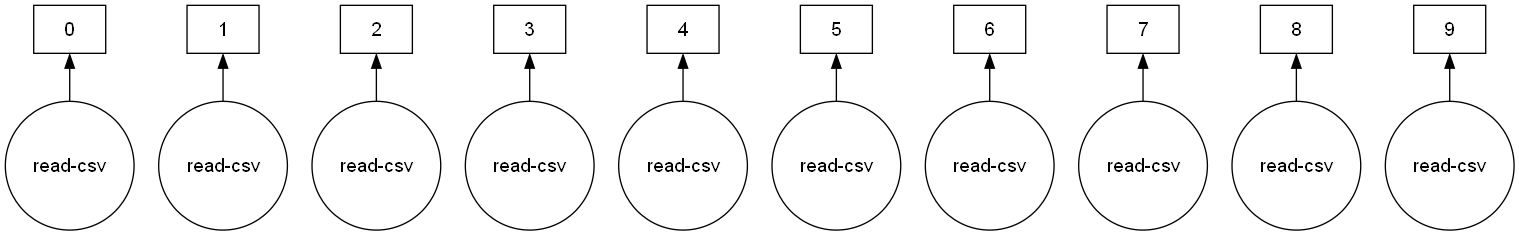

In [66]:

ddf.visualize()



Algunas funciones como `len` y `head` también desencadenan un cálculo. Específicamente, llamar a `len`:
- carga datos reales (es decir, carga cada archivo en un DataFrame de pandas)
- luego aplica las funciones correspondientes a cada DataFrame de pandas (también conocido como partición)
- combina los subtotales para darte el total general final


In [67]:

# cargar y contar el número de filas
len(ddf)


2611892


Puedes ver el inicio y el final de los datos como lo harías en pandas:


In [68]:

ddf.head()


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [69]:
# ddf.tail()


A diferencia de `pandas.read_csv`, que lee el archivo completo antes de inferir los tipos de datos, `dask.dataframe.read_csv` solo lee una muestra del principio del archivo (o del primer archivo si se utiliza un patrón glob). Estos tipos de datos inferidos se aplican luego al leer todas las particiones.

En este caso, los tipos de datos inferidos en la muestra son incorrectos. Las primeras `n` filas no tienen valor para `CRSElapsedTime` (que pandas infiere como `float`), y resulta que son cadenas (`object` dtype) más adelante. Ten en cuenta que Dask proporciona un mensaje de error informativo sobre la falta de coincidencia. Cuando esto sucede, tienes algunas opciones:

- Especificar directamente los dtypes mediante la palabra clave `dtype`. Esta es la solución recomendada, ya que es la menos propensa a errores (mejor ser explícito que implícito) y también la más eficiente.
- Aumentar el tamaño de la palabra clave `sample` (en bytes).
- Utilizar `assume_missing` para que `dask` asuma que las columnas inferidas como `int` (que no permiten valores faltantes) son realmente `floats` (que sí permiten valores faltantes). En nuestro caso particular, esto no se aplica.

En nuestro caso, usaremos la primera opción y especificaremos directamente los `dtypes` de las columnas problemáticas.


In [70]:

ddf = dd.read_csv(
    os.path.join("data", "nycflights", "*.csv"),
    parse_dates={"Date": [0, 1, 2]},
    dtype={"TailNum": str, "CRSElapsedTime": float, "Cancelled": bool},
)

ddf.tail()  # ahora funciona


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0



### Lectura desde almacenamiento remoto

Si estás pensando en cómputo distribuido, es probable que tus datos estén almacenados de forma remota en servicios (como S3 de Amazon o almacenamiento en la nube de Google) y estén en un formato más amigable (como Parquet). Dask puede leer datos en varios formatos directamente desde estos lugares remotos **perezosamente** y **en paralelo**.

Así es como puedes leer los datos de taxis amarillos de la ciudad de Nueva York desde Amazon S3:

```python

ddf = dd.read_parquet(
    "s3://nyc-tlc/trip data/yellow_tripdata_2012-*.parquet")

```


También puedes aprovechar las optimizaciones específicas de Parquet, como la selección de columnas y el manejo de metadatos. Obtén más información en [la documentación de Dask sobre cómo trabajar con archivos Parquet](https://docs.dask.org/en/stable/dataframe-parquet.html).

## Cálculos con `dask.dataframe`

Calculemos el retraso máximo del vuelo.

Con solo pandas, iteraríamos sobre cada archivo para encontrar los máximos individuales y luego encontraríamos el máximo final sobre todos los máximos individuales.


In [71]:

import pandas as pd

files = os.listdir(os.path.join('data', 'nycflights'))

maxes = []

for file in files:
    df = pd.read_csv(os.path.join('data', 'nycflights', file))
    maxes.append(df.DepDelay.max())
    
final_max = max(maxes)



`dask.dataframe` nos permite escribir código similar a pandas, que opera en conjuntos de datos más grandes que la memoria en paralelo.


In [72]:

%%time
resultado = ddf.DepDelay.max()
resultado.compute()


CPU times: total: 1.12 s
Wall time: 4.09 s


1435.0


Esto crea la computación perezosa para nosotros y luego la ejecuta.

**Nota:** Dask eliminará los resultados intermedios (como el DataFrame de pandas completo para cada archivo) tan pronto como sea posible. Esto significa que puedes manejar conjuntos de datos más grandes que la memoria, pero las computaciones repetidas tendrán que cargar todos los datos cada vez. (¿Ejecuta el código anterior nuevamente, es más rápido o más lento de lo que esperabas?)

Puedes ver el gráfico de tareas subyacente usando `.visualize()`:


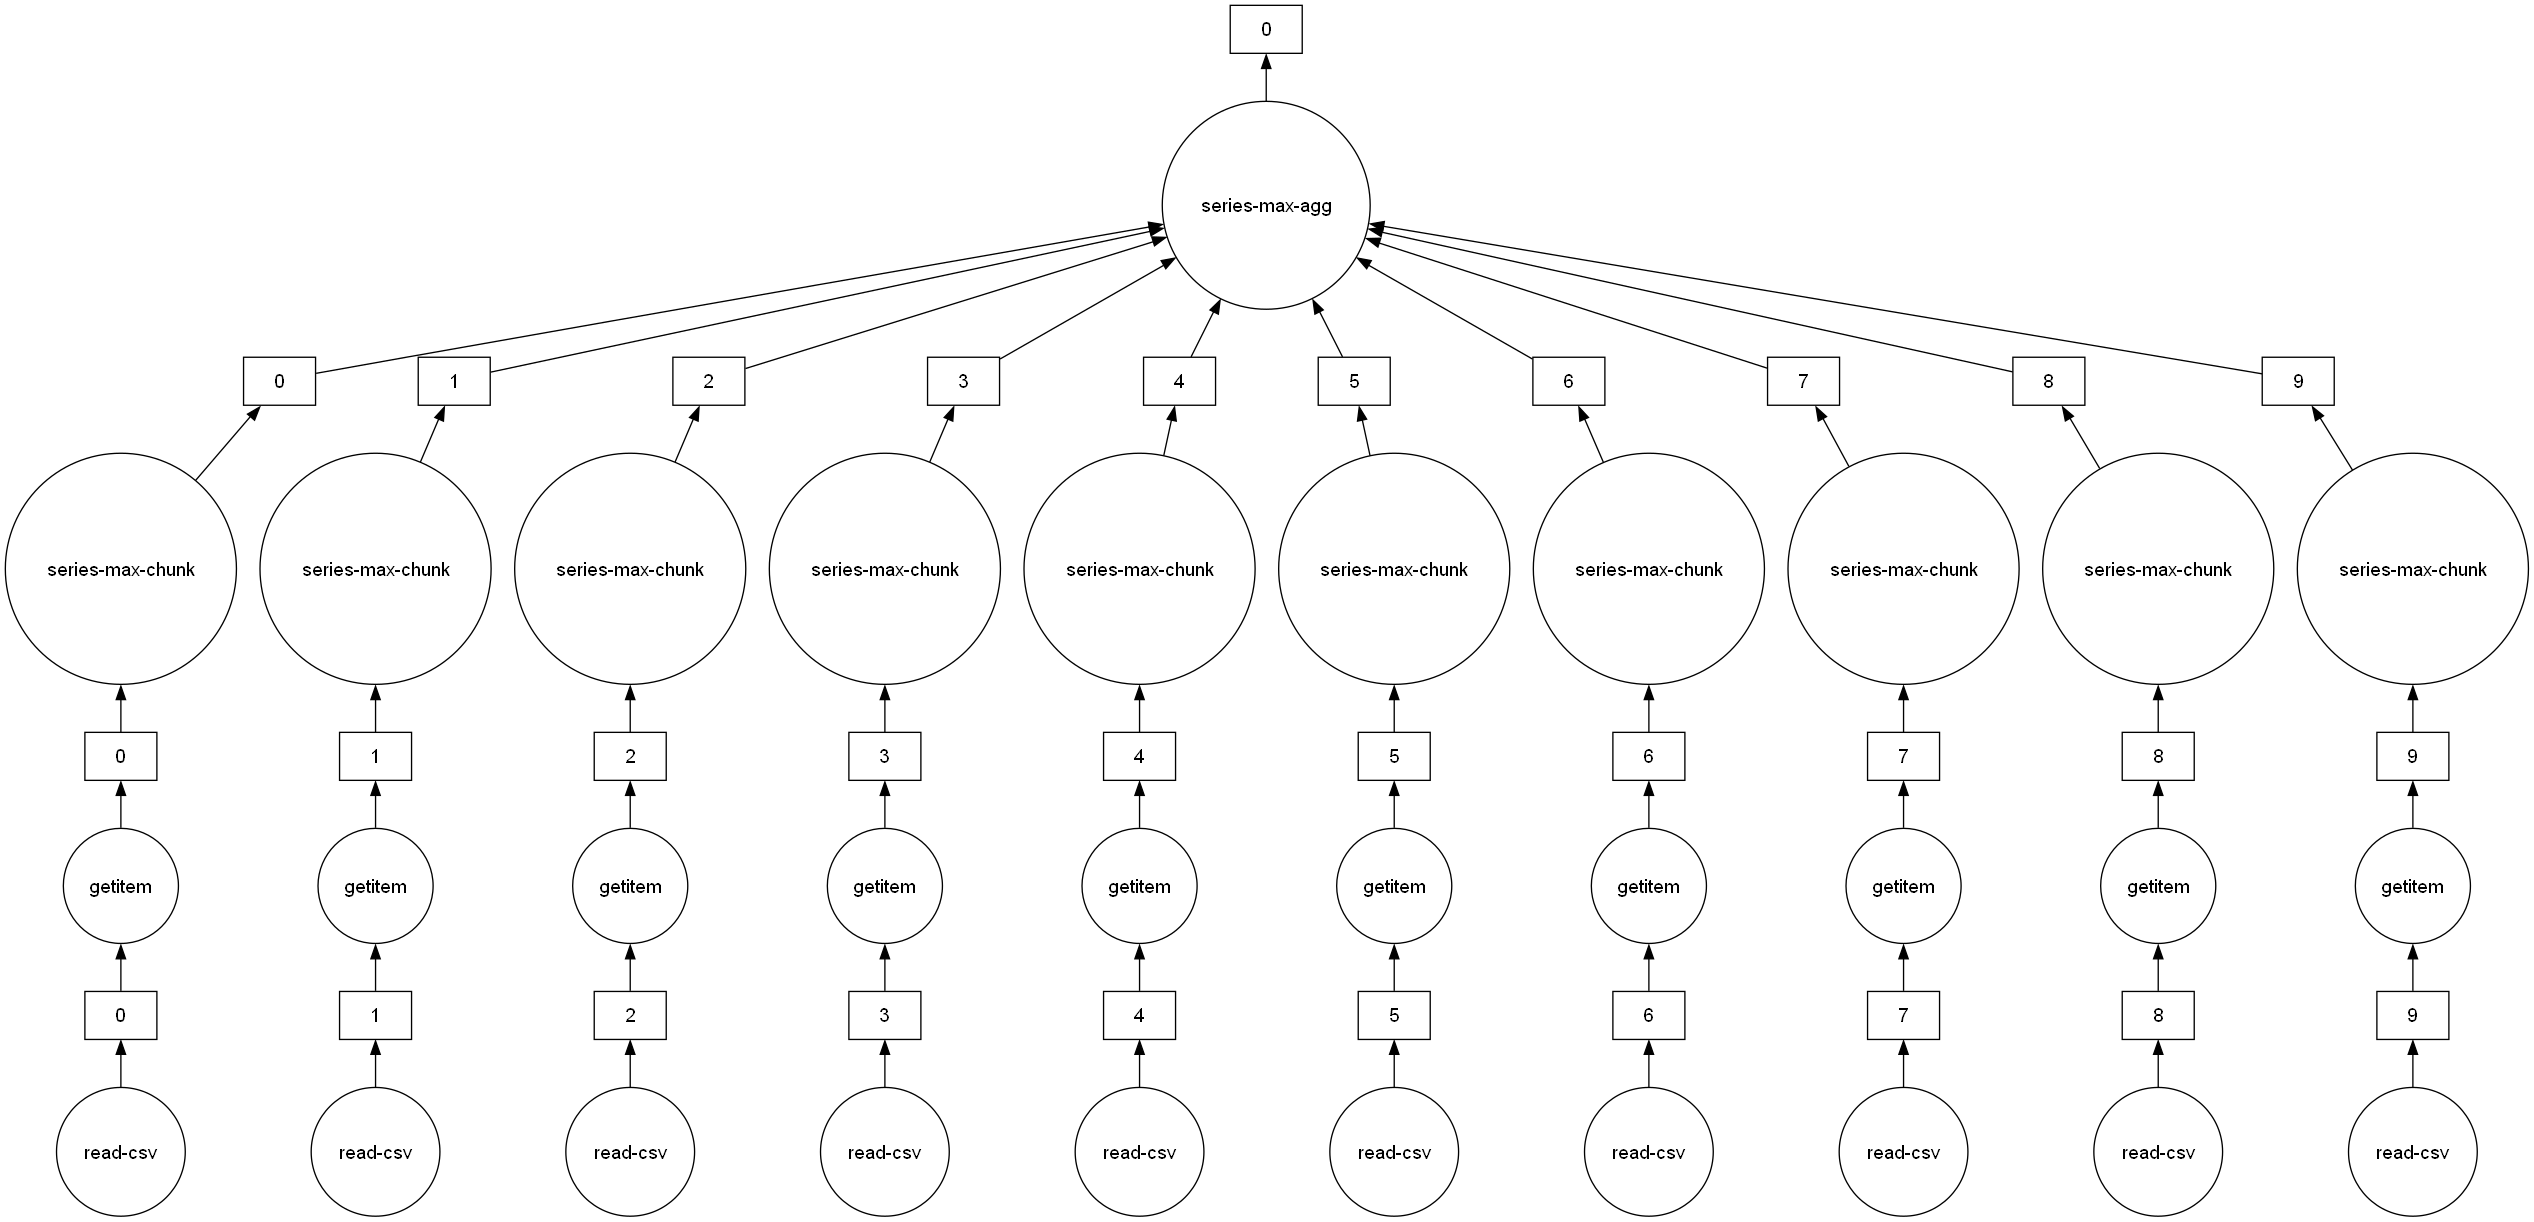

In [73]:

# observa la paralelización
resultado.visualize()



## Ejercicios

En esta sección realizarás algunas operaciones con `dask.dataframe`. Si estás familiarizado con pandas, estas operaciones te resultarán familiares. Deberás pensar cuándo llamar a `.compute()`.

### 1. ¿Cuántas filas hay en nuestro conjunto de datos?

_Consejo_: ¿cómo verificarías cuántos elementos hay en una lista?


In [74]:

# Tu código aquí


### 2. En total, ¿cuántos vuelos no cancelados se realizaron?
 Sugerencia: usa indexación booleana.


In [75]:

# Tu código aquí


### 3. En total, ¿cuántos vuelos no cancelados se realizaron desde cada aeropuerto?
 Sugerencia: usa groupby.


In [76]:

# Tu código aquí



### 4. ¿Cuál fue el retraso promedio en la salida desde cada aeropuerto?


In [77]:

# Tu código aquí




### 5. ¿Qué día de la semana tiene el peor retraso promedio en la salida?


In [78]:

# Tu código aquí



### 6. Supongamos que la columna de distancia es errónea y necesitas sumar 1 a todos los valores, ¿cómo lo harías?


In [79]:

# Tu código aquí



### Compartir resultados intermedios

 Al calcular todo lo anterior, a veces realizamos la misma operación más de una vez.
 Para la mayoría de las operaciones, `dask.dataframe` almacena los argumentos, permitiendo que las computaciones duplicadas se compartan y se realicen solo una vez.
 Por ejemplo, calculemos la media y la desviación estándar para el retraso en la salida de todos los vuelos no cancelados.
 Dado que las operaciones de Dask son perezosas, esos valores no son los resultados finales aún. Son solo los pasos necesarios para obtener el resultado.
 Si los calculas con dos llamadas a compute, no hay compartición de computaciones intermedias.


In [80]:

non_canceled = ddf[~ddf.Cancelled]
mean_delay = non_canceled.DepDelay.mean()
std_delay = non_canceled.DepDelay.std()


In [81]:

%%time

mean_delay_res = mean_delay.compute()
std_delay_res = std_delay.compute()


CPU times: total: 1.95 s
Wall time: 7.99 s





### Intentemos pasando ambos a una sola llamada `compute`.


In [82]:
%%time

mean_delay_res, std_delay_res = dask.compute(mean_delay, std_delay)


CPU times: total: 891 ms
Wall time: 4.05 s



Usar `dask.compute` lleva aproximadamente la mitad del tiempo. Esto se debe a que los gráficos de tareas para ambos resultados se fusionan al llamar a `dask.compute`, lo que permite que las operaciones compartidas se realicen solo una vez en lugar de dos veces.

 Para ver cómo se ven los gráficos de tareas fusionados entre múltiples resultados y qué se comparte, puedes usar la función `dask.visualize` (podrías querer usar `filename='graph.pdf'` para guardar el gráfico en disco y poder hacer zoom más fácilmente).


In [83]:

dask.visualize(mean_delay, std_delay, engine="cytoscape")


CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'BT', 'nodeSep': 10, 'edgeSep': 10, 'spacingFact…


### `.persist()`

 Al usar un planificador distribuido (aprenderás más sobre los planificadores en los próximos cuadernos), puedes mantener algunos _datos que deseas usar con frecuencia_ en la _memoria distribuida_.

 `persist` genera "Futures" (más sobre esto más adelante) y los almacena en la misma estructura que tu salida. Puedes usar `persist` con cualquier dato o cálculo que quepa en memoria.

Si deseas analizar datos solo para vuelos no cancelados que salen del aeropuerto JFK, puedes tener dos llamadas de compute como en la sección anterior:


In [84]:
non_cancelled = ddf[~ddf.Cancelled]
ddf_jfk = non_cancelled[non_cancelled.Origin == "JFK"]


In [85]:
%%time
ddf_jfk.DepDelay.mean().compute()
ddf_jfk.DepDelay.sum().compute()


CPU times: total: 3.22 s
Wall time: 11.5 s


4422520.0

 O, considera persistir ese subconjunto de datos en memoria.

Consulta el panel de control "Graph", los cuadrados rojos indican datos persistentes almacenados como Futures en la memoria. También notarás un aumento en el consumo de memoria del trabajador (otro gráfico del panel de control).


In [86]:

ddf_jfk = ddf_jfk.persist()  # devuelve el control inmediatamente


In [87]:

%%time
ddf_jfk.DepDelay.mean().compute()
ddf_jfk.DepDelay.std().compute()


CPU times: total: 1.16 s
Wall time: 4.47 s


31.24250979827115

In [88]:
client.close()

Revisa la siguiente documentación

* [Series de tiempo con Prophet](https://colab.research.google.com/github/dask/dask-examples/blob/main/applications/forecasting-with-prophet.ipynb#scrollTo=QgT0w7Gq_YAZ)

* [Machine Learning](https://colab.research.google.com/github/dask/dask-examples/blob/main/applications/evolving-workflows.ipynb)

* [Entrenamiento de grandes conjuntos de datos ](https://colab.research.google.com/github/dask/dask-examples/blob/main/machine-learning/training-on-large-datasets.ipynb)

* [delayed](https://colab.research.google.com/github/dask/dask-examples/blob/main/delayed.ipynb#scrollTo=ZmB0asbE_R2I)

* [ETL](https://colab.research.google.com/github/dask/dask-examples/blob/main/applications/prefect-etl.ipynb)

* [WorkFlows](https://colab.research.google.com/github/dask/dask-examples/blob/main/applications/evolving-workflows.ipynb)